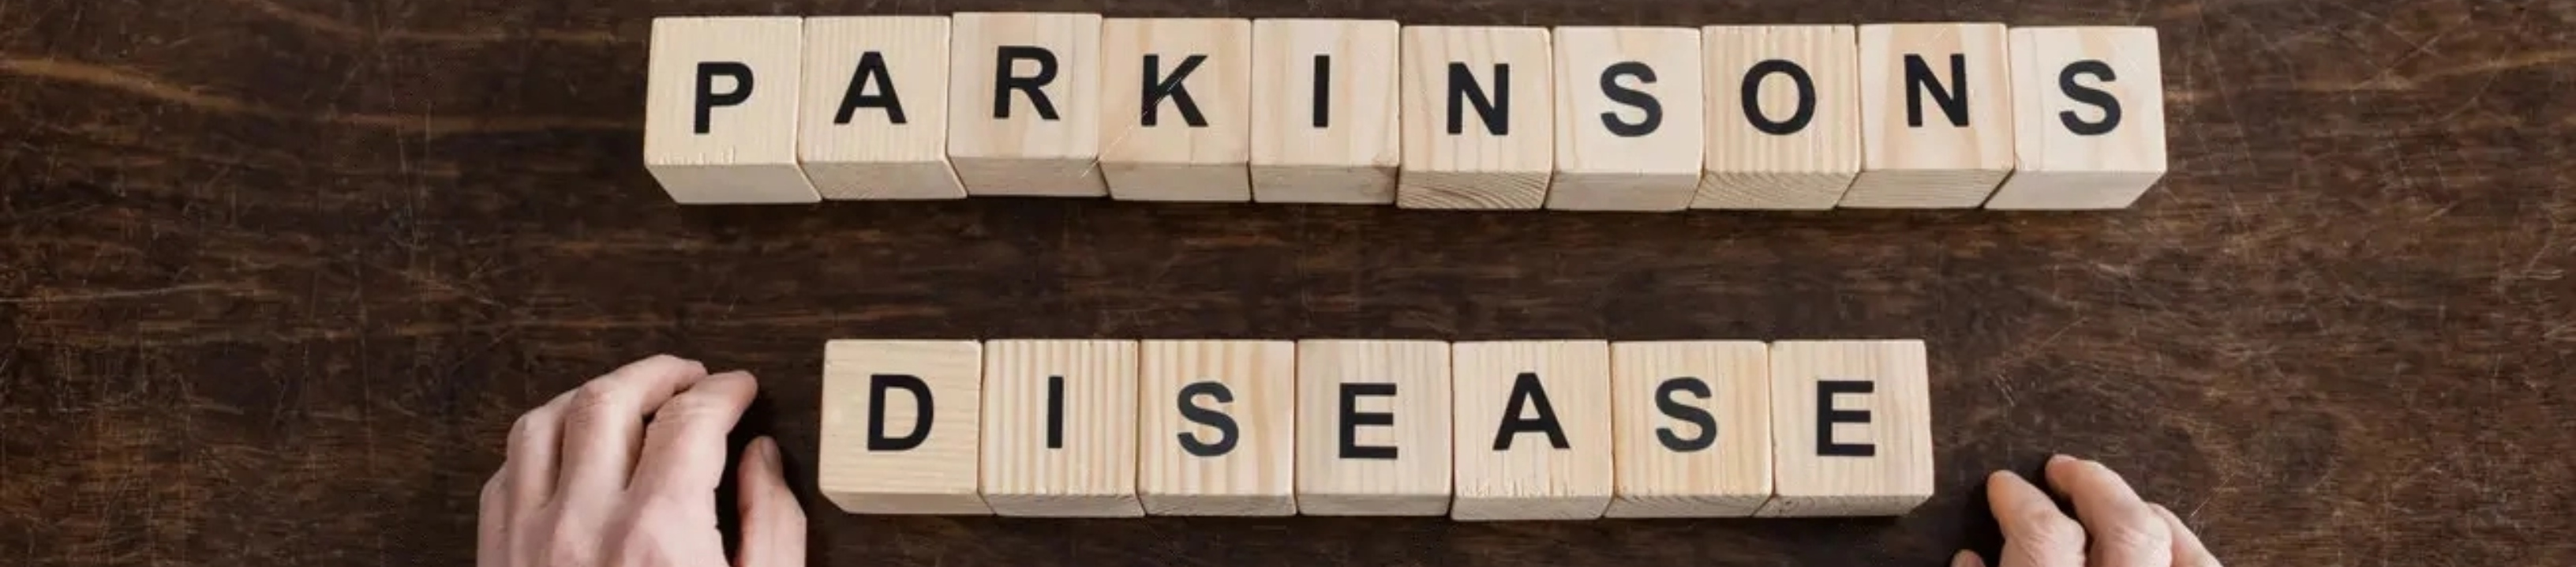

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# <span style='background :#e0cebd; color :#000000' > Uploading the dataset </span>   

In [4]:
data = pd.read_csv('Parkinsson disease.csv')

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
data = data.drop(columns='name')

***

# <span style='background :#e0cebd; color :#000000' > Correlation Matrix </span>   

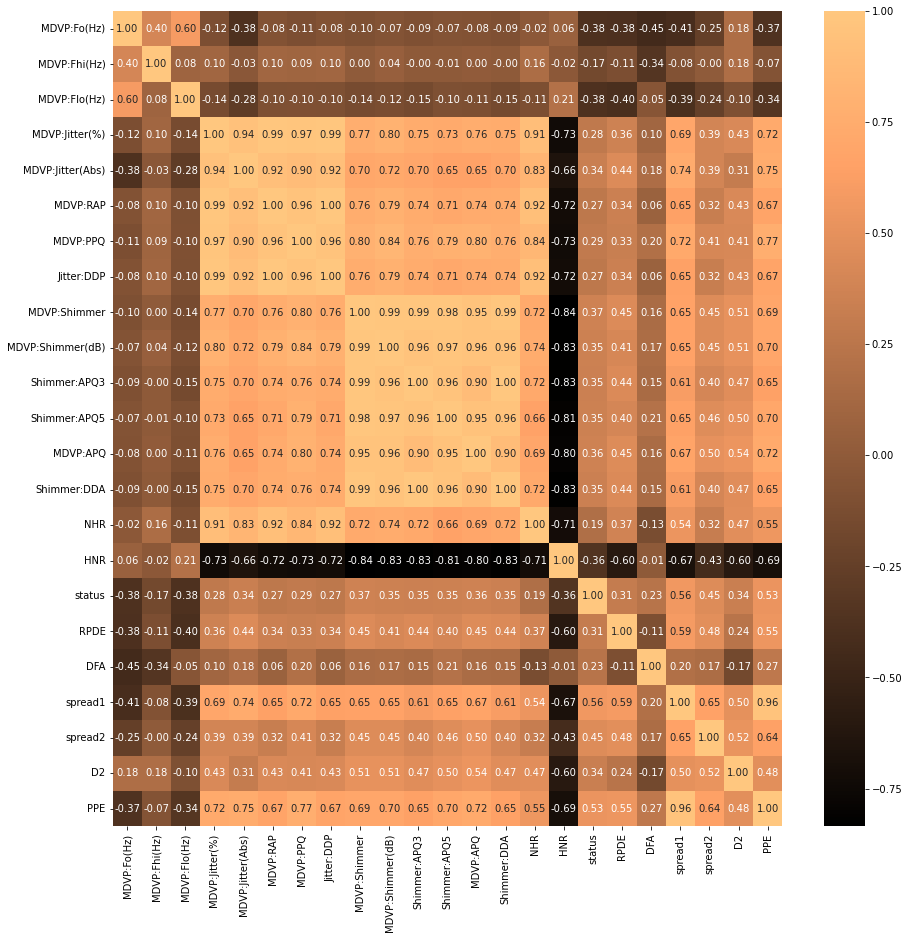

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='copper');

***

# <span style='background :#e0cebd; color :#000000' > Splitting the dataset </span>   

In [53]:
x = data.loc[:, data.columns != 'status'].values[:, 1:]
y = data.loc[:, 'status'].values

# splitting 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.45)

***

# <span style='background :#e0cebd; color :#000000' > Model Fitting & Calculating the Score </span>   

In [54]:
model = XGBClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = accuracy_score(y_test, predict)
print('Accuracy of the model is: %0.4f ' % score)

Accuracy of the model is: 0.9318 


***

# <span style='background :#e0cebd; color :#000000' > Confusion Matrix </span>   

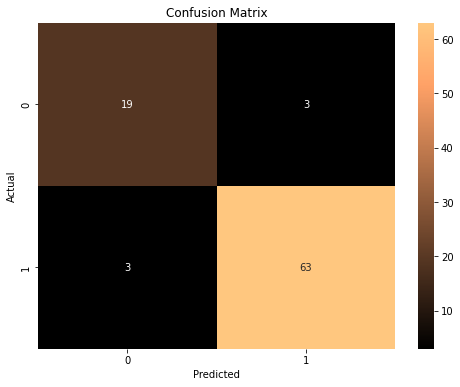

In [57]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize = (8,6))
fg = sns.heatmap(cm, annot=True, cmap='copper')
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

***